# 2. Modelos de distribución multivariados

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---


In [42]:
# cargar algunas funciones que se utilizarán
source("../r_scripts/utilities.r")

## 2.0. Preliminares

### Inversa

Considerar la matriz cuadrada $A_{p\times p}$. Sea la matriz cuadrada $B_{p\times p}$ una matriz con la propiedad de $AB = I = BA$. En este caso, $B_{p\times p}$ es llamada _la inversa_ de $A$, y se denota como $A^{-1}$. La matrix $I$ es una matriz especial cuyas diagonales son 1, y por encima y debajo de las diagonales solo hay 0s.

$$
  I_{p\times p}= \begin{bmatrix}
  1 & 0 & 0 & \cdots & 0\\
  0 & 1 & 0  & \cdots & 0 \\
  0 & 0 & 1 & \cdots & 0 \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & 0 & \cdots & 1
  \end{bmatrix}
$$

Considerar las matrices

$$
  A = \begin{bmatrix}
  a_{11} & a_{12} \\
  a_{21} & a_{22}
  \end{bmatrix}\quad
  A' = \begin{bmatrix}
  a_{22} & -a_{12} \\
  -a_{21} & a_{11}
  \end{bmatrix}
$$

El producto de ambas es

$$
  AA' = \begin{bmatrix}
    a_{11}a_{22} - a_{12}a_{21} & 0 \\
    0 & a_{11}a_{22} - a_{12}a_{21}
  \end{bmatrix} = (a_{11}a_{22} - a_{12}a_{21})I
$$

Dado que $AA^{-1} = I$, entonces

$$
  A^{-1} = \frac{1}{a_{11}a_{22} - a_{12}a_{21}}A' = \frac{1}{a_{11}a_{22} - a_{12}a_{21}}\begin{bmatrix}
  a_{22} & -a_{12} \\
  -a_{21} & a_{11}
  \end{bmatrix} \tag{1}
$$

**Nota**: para que $A^{-1}$ exista, es decir, para que $A$ sea _invertible_, $a_{11}a_{22} - a_{12}a_{21} \neq 0$.


### Determinante

Los determinantes solo están definidos para matrices cuadradas $A_{p\times p}$ (matrices que tienen el mismo número de filas que de columnas). El determinante $\text{det}(A)$ o $|A|$ es una función que mapea $A$ a números reales.

De la sección [Inversa](#inversa), sabemos que para una matriz de $2\times 2$, $A^{-1}$ existe si y solo si $a_{11}a_{22} - a_{12}a_{21} \neq 0$. Esta cantidad es el determinante de $A\in \mathbb{R}^{2\times 2}$, es decir

$$
  \text{det}(A)_{2\times 2} = a_{11}a_{22} - a_{12}a_{21}\tag{2}
$$

**Nota**: Tanto en [Inversa](#inversa) como en [Determinante](#determinante) se usó un ejemplo de una matriz sencilla de $2\times 2$. En general, para cualquier matriz $A_{p\times p}$, para que $A^{-1}$ exista, $\text{det}(A_{p\times p})\neq 0$. Es decir, _una matriz cuadrada es invertible **si y solo si** su determinante es diferente de 0._

Se da ahora una expresión general para obtener el determinante de cualquier matriz cuadrada. Sea $A$ la matriz cuadrada ${p\times p}$. Para todo $j=1, \dots, p$, el determinante expandido a través de la fila $j$ se obtiene con

$$
  \text{det}(A) = |A| = \sum_{k=1}^{p}(-1)^{k+j}a_{jk}\text{det}(A_{j,k}) \tag{3}
$$

En donde $A_{j,k}\in \mathbb{R}^{(p-1)\times (p-1)}$ es una _submatriz_ que obtenemos eliminando la fila $j$ y la columna $k$, y $a_{jk}$ es la entrada de la matriz $A$ en la fila $j$ y columna $k$. A la ecuación (2) se le conoce como la expansión de Laplace.

Por ejemplo

$$
  A = \begin{bmatrix}
  1 & 2 & 3\\
  3 & 1 & 2\\
  0 & 0 & 1
  \end{bmatrix}
$$

Usando la expansión de Laplace a en la primera fila, aplicando (2) obtenemos

$$
  |A| = \begin{vmatrix}
  1 & 2 & 3\\
  3 & 1 & 2\\
  0 & 0 & 1
  \end{vmatrix} = %
  \underbrace{(-1)^{1+1}\times 1 \begin{vmatrix}
  1 & 2\\
  0 & 1
  \end{vmatrix}}_{k=1} %
  + \underbrace{(-1)^{1+2}\times 2\begin{vmatrix}
  3 & 2\\
  0 & 1
  \end{vmatrix}}_{k=2} %
    + \underbrace{(-1)^{1+3}\times 3\begin{vmatrix}
  3 & 1\\
  0 & 0
  \end{vmatrix}}_{k=3}
$$

Podemos ahora calcular los determinantes $2\times 2$ usando la ecuación (2). Por ejemplo,

$$
  \begin{vmatrix}
  1 & 2\\
  0 & 1
  \end{vmatrix} = 1\times 1 - 0\times 2 = 1-0
$$

Con lo que tenemos al final $\text{det}(A) = -5$.


En `R`


In [43]:
A <- matrix(
  c(
    1, 2, 3,
    3, 1, 2,
    0, 0, 1
  ),
  byrow = TRUE, # especificar que el orden sea por fila de 3 en 3
  ncol = 3
)
# el determinante
det(A)
# la inversa se obtiene con
solve(A)

[1] -5

-0.2,0.4,-0.2
0.6,-0.2,-1.4
0.0,0.0,1.0


### Núcleo (kernel o espacio nulo)

Considerar la siguiente ecuación

$$
  A \mathbf{x} = \mathbf{0}
$$

El kernel $\text{ker}(A\mathbf{x})$ captura todas las posibles combinaciones lineales $a_1x_1 + \dots + a_px_p$ que producen $\mathbf{0}$. En ese sentido, el kernel es un subespacio de soluciones para $A \mathbf{x} = \mathbf{0}$.


### Eigenvalores y eigenvectores

Considerar la matriz cuadrada $A_{p\times p}$. Si existe un escalar $\lambda$ y un vector $\mathbf{x}$ tal que

$$
  A\mathbf{x} = \lambda\mathbf{x} \tag{4}
$$

La ecuación (3) es llamada _la ecuación de eigenvalores_. $\lambda$ es un _eigenvalor_ (valor propio) y $\mathbf{x}$ un eigenvector.

Un eigenvalor $\lambda$ es la raíz del polinomio de orden $p$,

$$
  (A - \lambda I)\mathbf{x}=\mathbf{0} \tag{5}
$$

por lo que hay $p$ eigenvalores de $A$. A cada eigenvalor $\lambda_j$ le corresponde un eigenvector $x_j$. Dado que $\mathbf{x} \neq \mathbf{0}$, la ecuación (4) implica que $(A - \lambda I) =\mathbf{0}$, y el kernel $\text{ker}(A - \lambda I)$ debe contener más elementos que no sean $\mathbf{0}$, es decir $x \in \text{ker}(A-\lambda I)$, por lo que la matriz no es invertible y su determinante es 0, es decir

$$
  \text{det}(A - \lambda I) = 0 \tag{6}
$$

A la ecuación (5) se le conoce como _polinomio característico_. En la matriz

$$
  A = \begin{bmatrix}
  4 & 2 \\
  1 & 3
  \end{bmatrix}
$$

Su polinomio característico es

$$
p_A(\lambda) = \text{det}(A - \lambda I) = \text{det} %
\left( %
\begin{bmatrix}
  4 & 2 \\
  1 & 3
\end{bmatrix} - %
\begin{bmatrix}
  \lambda & 0 \\
  0 & \lambda
\end{bmatrix}
\right) =
\begin{vmatrix}
  4 - \lambda & 2 \\
  1           & 3 - \lambda
\end{vmatrix}
$$

Que se reduce a

$$
  p_A(\lambda) = (4 - \lambda)(3 - \lambda) - 2 = 0
$$

Y factorizando

$$
  p_A(\lambda) = (2 - \lambda)(5 - \lambda) = 0
$$

Cuyas soluciones son $\lambda_1 = 2, \lambda_2 = 5$.

Los eigenvectores se pueden encontrar sustituyendo los eigen valores en

$$
  \begin{bmatrix}
  4 - \lambda & 2 \\
  1           & 3 - \lambda
\end{bmatrix}\mathbf{x} = \mathbf{0}
$$

**Nota**: el determinante de $A$ es el producto de sus eigenvalores

$$
  \text{det}(A) = \prod_{i=1}^n \lambda_i
$$


### Descomposición expectral

La matriz cuadrada $A_{p\times p}$ puede se reescrita como

$$
  A = \mathbf{P} D \mathbf{P}^{-1} \tag{7}
$$

En donde la matriz diagonal $D = \text{diag}(\lambda_1, \lambda_2,\dots,\lambda_p)$.

**Nota**: Cuando $A$ es simétrica, $\mathbf{P}$ es ortogonal, lo que significa que $\mathbf{P}\mathbf{P}^\top=\mathbf{P}\mathbf{P}^{-1}=I$, o lo que es lo mismo, $\mathbf{P}^\top=\mathbf{P}^{-1}$, por lo que

$$
  A = \mathbf{P} D \mathbf{P}^\top
$$

### Matrices triangulares y factorización de Cholesky

Una matriz simétrica definida positiva $A \in \mathbb{R}^{p\times p}$ puede ser factorizada como el producto 

$$A = LL^\top$$

En donde $L$ es la matriz triangular inferior, una matriz cuadrada especial cuyas entradas por encima de la diagonal son 0s.

$$
  L = \begin{bmatrix}
    l_{11} & 0 & \cdots & \cdots & 0 \\
    l_{12} & l_{22} & \ddots &  & \vdots\\
    \vdots & \ddots & \ddots & \ddots & \vdots\\
    \vdots &  & \ddots & \ddots & 0\\
    l_{1p} & \cdots & \cdots & l_{p-1p} & l_{pp}
\end{bmatrix}
$$

En `R` se obtiene con la función `chol()`.

In [44]:
## eigenvalores y descomposición espectral
# Crear A
A <- matrix(
  data = c(-3, 4, 5, -2),
  nrow = 2
)

# eigenvalores y eigenvectores usando la función eigen(), ?eigen para ayuda
# retorna un objeto de dos elementos: los eigenvalores y los eigenvectores
eig <- eigen(A) # desc. espectral

# crear P
P <- eig$vectors

# crear la diagonal de eigenvalores D
D <- diag(eig$values)
# verificar eq 7; la inversa de P se obtiene con solve(P)
list(
  APDP = P %*% D %*% solve(P),
  A = A
)


-3,5
4,-2
-3,5
4,-2


In [45]:
# determinante es igual al producto de los eigenvalores
det(A)
prod(eig$values)


[1] -14

[1] -14

In [46]:
# Ahora verificamos que si A es simétrica, P es ortogonal
# A simétrica
A <- matrix(
  data = c(1, 4, 2, 4, 1, 3, 2, 3, 1),
  nrow = 3
)
eig <- eigen(A)
# P
P <- eig$vectors
# Inversa de P
solve(P)
# transpuesta de P
t(P)

A # A es igual al producto PDP'
P %*% diag(eig$values) %*% t(P)


-0.5843738,-0.6345775,-0.5057852
0.5449251,0.1549789,-0.8240377
0.6013018,-0.7571611,0.2552315


-0.5843738,-0.6345775,-0.5057852
0.5449251,0.1549789,-0.8240377
0.6013018,-0.7571611,0.2552315


1,4,2
4,1,3
2,3,1


1,4,2
4,1,3
2,3,1


## 2.2. Distribución multinormal

Ya vimos que para la distribución normal univariada, la función de densidad está dada por

$$
  p(x) = \frac{1}{\sigma \sqrt{2\pi}} e\left\{\frac{-(x-\mu)^2}{2\sigma^2}\right\}  \tag{8}
$$

Cuando $\mu = 0, \sigma = 1$, la ecuación (8) es una distribución especial llamada _distribución normal estándar_. La distribución normal estándar $\mathcal{N}(0, 1)$ tiene ciertas propiedades interesantes:

1. En el intervalo $\left[\mu - \sigma, \mu + \sigma \right]$ se cubre el 0.683 del área total, es decir, $p(\mu - \sigma \leq X \leq \mu + \sigma) \approx 0.68$.
2. En el intervalo $\left[\mu - 2\sigma, \mu + 2\sigma \right]$ se cubre el .954 del área total.
3. El área en $X \leq \mu - \sigma$ es $1 - p(X > \mu - \sigma)$


In [47]:
# dado que la distribución es simétrica, p(mu - sigma <= X <= mu+sigma)
# la región mu-sigma es igual que mu+sigma, por lo tanto, es suficiente
# con restarle a 1 la probabilidad p(mu-sigma <= X) * 2
(1 - (pnorm(-1, mean = 0, sd = 1)) * 2) |> round(3)
(1 - (pnorm(-2, mean = 0, sd = 1)) * 2) |> round(3)
# con 3 sigma cubre el 99 % del espacio
(1 - (pnorm(-3, mean = 0, sd = 1)) * 2) |> round(3)
# la probabilidad de x <= mu-sigma es
1 - (pnorm(1, mean = 0, sd = 1)) |> round(3)
# o equivalentemente
(pnorm(-1, 0, 1)) |> round(3)


[1] 0.683

[1] 0.954

[1] 0.997

[1] 0.159

[1] 0.159

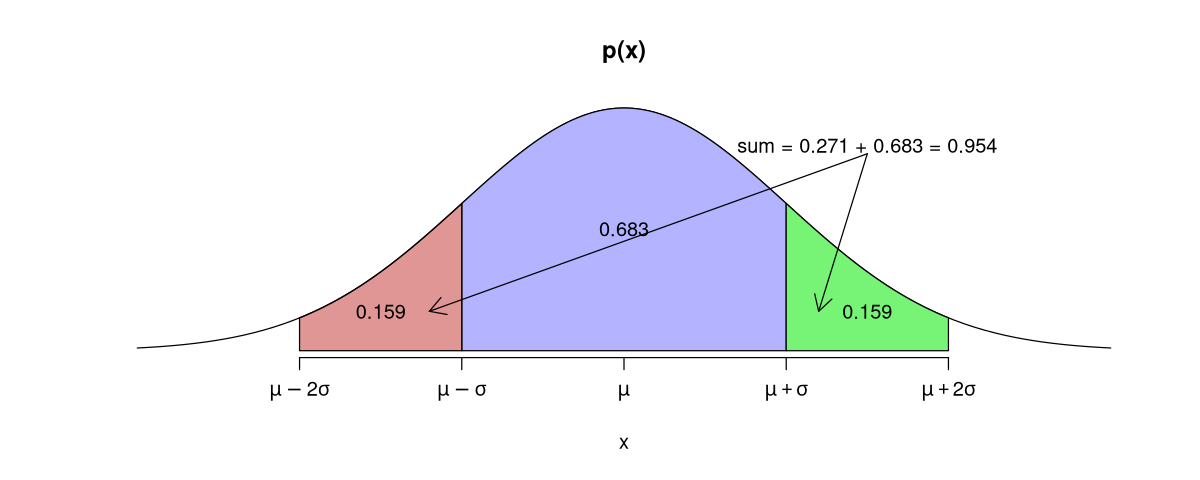

In [48]:
# fijar tamaño de gráficos
options(repr.plot.width = 10, repr.plot.height = 4)
# graficar normal estándar
# colores
red_light <- "#be1b1b75"
blue_light <- "#B3B3FF"
green_light <- "#77f475"
curve(dnorm(x, 0, 1),
  from = -3, to = 3,
  axes = FALSE,
  ylab = "",
  main = "p(x)",
  panel.first = {
    axis(1,
      at = c(-2:2),
      labels = parse(text = c("mu-2*sigma", "mu-sigma", "mu", "mu+sigma", "mu+2*sigma"))
    )
  }
)
# función cargada en utilities.R
# graficar area de x entre [mu-sigma, mu+sigma]
plot_area_normal(
  from_x = -1,
  to_x = 1,
  fill = blue_light
)
# graficar área de mu-2sigma <= x <= mu-sigma
plot_area_normal(
  from_x = -2,
  to_x = -1,
  fill = red_light
)
plot_area_normal(
  from_x = 1,
  to_x = 2,
  fill = green_light
)
# anotación de proporción de la curva
x_lab_pos <- c(-3 / 2, 0, 3 / 2) # posición en x
y_lab_pos <- dnorm(x_lab_pos, 0, 1) / 2 # posición en y
text(
  x = x_lab_pos,
  y = y_lab_pos,
  # a la izquierda de la zona azul es
  labels = c(
    (pnorm(-1, 0, 1)) |> round(3),
    (1 - (pnorm(-1, mean = 0, sd = 1)) * 2) |> round(3),
    (pnorm(-1, 0, 1)) |> round(3)
  )
)
arrows(
  x0 = c(x_lab_pos[1] * 0.8, x_lab_pos[3] * 0.8),
  y0 = c(y_lab_pos[1], y_lab_pos[3]),
  x1 = rep(1.5, 2),
  y1 = dnorm(rep(1.5, 2)) * 2.5,
  length = 0.15,
  code = 1
)
text(
  x = 1.5,
  y = dnorm(1.5) * 2.6,
  label = glue::glue("sum = {(0.954 - 0.683)} + 0.683 = {0.683 + (0.954 - 0.683)}")
)

El término en el exponente en la ecuación (8)

$$
  \frac{(x-\mu)^2}{2\sigma^2}
$$

Puede ser convenientemente reescrito como

$$
  \frac{(x-\mu)^2}{2\sigma^2} = (x - \mu)(\sigma^2)^{-1}(x-\mu)
$$

Para mostrar que este término mide el cuadrado de la distancia entre $x$ y $\mu$ en unidades de desviación estándar. Esta distancia ser generalizada para un vector $\mathbf{x} \in \mathbb{R}^D$ de $D$ variables como

$$
  (\mathbf{x}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) \tag{9}
$$

A la ecuación (9) se le conoce como distancia de Mahalanobis (en realidad, el cuadrado de la distancia de Mahalanobis), que es la distancia entre un punto y su distribución (univariada o multivariada). El significado de los parámetros se describe en la siguiente sección.


### 2.2.1. Distribución bivariada

La distribución normal multivariada (MVN) se caracteriza completamente por el vector de medias $\boldsymbol{\mu}$ y la matriz de covarianzas $\boldsymbol{\Sigma}$

$$
  p(\mathbf{x} \mid \boldsymbol{\mu},\boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{D/2}|\boldsymbol{\Sigma}|^{1/2}}e\left\{ -\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\boldsymbol{y}-\boldsymbol{\mu}) \right\} \tag{10}
$$

En donde $\boldsymbol{\mu}=\mathbb{E}[y]$ y $D=\text{dim}(\boldsymbol{y})$ (la dimensión de $\boldsymbol{y}$; en el caso de una normal bivariada $D=2$). $\boldsymbol{\Sigma}$ es la matriz simétrica $D\times D$ de covarianza. En $D=2$ (bivariada), $\boldsymbol{\Sigma}$ es

$$
  \boldsymbol{\Sigma} = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12}^2\\
  \sigma_{21}^2 & \sigma_{2}^2
  \end{bmatrix}
$$

Como se vio en la lección 1, el coeficiente de correlación $\rho$ es igual a la covarianza $\sigma_{12}^2$ dividida por el producto de las desviaciones estándar $\sigma_1\sigma_2$

$$
  \rho_{X_1,X_2} = \frac{\sigma_{12}^2}{\sigma_1\sigma_2}
$$

Por lo que, despejando, tenemos $\sigma_{12}^2 = \rho\sigma_1\sigma_2$. La matriz de covarianzas puede ser reescrita como

$$
  \boldsymbol{\Sigma} = \begin{bmatrix}
  \sigma_1^2 & \rho\sigma_1\sigma_2\\
  \rho\sigma_1\sigma_2 & \sigma_{2}^2
  \end{bmatrix} \tag{11}
$$

El determinante $|\Sigma|$ para la bivariada es, de acuerdo con la ecuación (2)

$$
\begin{align*}
  \text{det}(\Sigma) &= \sigma_1^2\sigma_2^2 - (\rho\sigma_1\sigma_2)^2\\
                     &= \sigma_1^2\sigma_2^2 - \rho^2\sigma_1^2\sigma_2^2\\
                     &= \sigma_1^2\sigma_2^2(1-\rho^2) \tag{12}
\end{align*}
$$

Esta forma de representar la distribución bivariada (aplica también para al MVN) enfatiza la influencia de la correlación en la pdf conjunta. En la siguiente sección simulamos dicha influencia.

**Propiedades de la MVN**:

1. Las combinaciones lineales de los componentes de $\mathbf{x}\sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ también están distribuidas normalmente, $\mathbf{a^\top x} = a_1x_1 + \dots + a_Dx_D \sim \mathcal{N}(\boldsymbol{a^\top\mu}, \boldsymbol{a^\top\Sigma})$
2. Covarianza de cero implica que los componentes de $\mathbf{x}$ están distribuidos independientemente.
3. Las distribuciones condicionales de los componentes, e.g., $x_1 | x_2$ ($x_1$ dado $x_2$), también están distribuidas normalmente, con media $\mu_1 + \frac{\sigma_{12}}{\sigma_{22}}(x_2 - \mu_2)$ y desviación estándar $\sigma_{11}(1-\rho_{12}^2)$ (para el caso de la bivariada, $\rho_{12}=\rho$), es decir,
   $$
   x_1|x_2 \sim \mathcal{N}\left(%
     \mu_1 + \frac{\sigma_{12}}{\sigma_{22}}(x_2 - \mu_2),\sigma_{11}(1-\rho_{12}^2)%
     \right)
   $$


#### Muestras bivariadas

Algoritmo para generar muestras $\mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) con media aribitraria $\mathbf{x}$ y matriz de covarianza $\boldsymbol{\Sigma}$ con generador gaussiano (i.e., normal):

1. Computar la [factorización de Cholesky](#matrices-triangulares-y-factorización-de-cholesky) $L$ de una matriz positiva definida $\boldsymbol{\Sigma}=LL^\top$, en donde $L$ es la matriz [triangular inferior](#matrices-triangulares-y-factorización-de-cholesky).
2. Generar una muestra $\mathbf{u} \sim \mathcal{N}(\mathbf{0}, I)$ (normal estándar).
3. Computar $\mathbf{x} = \boldsymbol{\mu} + L\mathbf{u}$, que tendrá la distribución deseada.


<a name="cite_note-1"></a>1. [^](#cite_ref-1) C. E. Rasmussen & C. K. I. Williams (2006). *Gaussian Processes for Machine Learning*. The MIT Press, 2006

2.0,0.0
-4.8,6.4


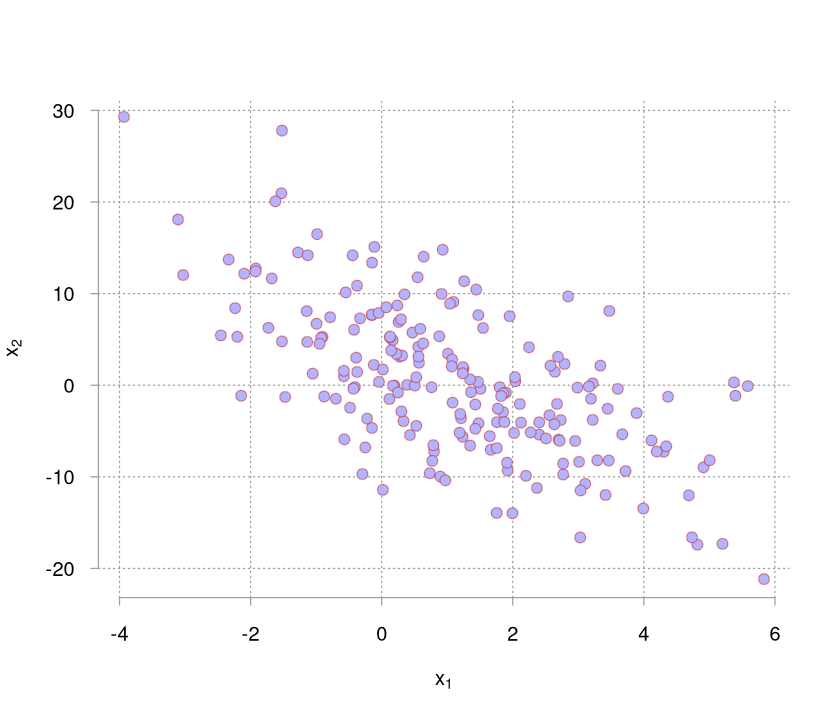

In [49]:
options(repr.plot.width = 7, repr.plot.height = 6)
rho <- -0.6
N <- 200
sigma_1 <- 2
sigma_2 <- 8
# por ecuación 11
Sigma <- matrix( # matriz de covarianza
  c(
    sigma_1^2, rho * sigma_1 * sigma_2,
    rho * sigma_1 * sigma_2, sigma_2^2
  ),
  ncol = 2
)
mu1 <- 1
mu2 <- 1
mu_vec <- c(mu1, mu2)
L <- t(chol(Sigma))
L # matriz triangular
set.seed(123)
u <- matrix(rnorm(2 * N), 2, N) # 2 filas, N/2 columnas
# sumar element-wise, mu1 + col_1, mu2 + col_2
x <- (mu_vec + t(L %*% u))

scatter_plot(
  x[, 1], x[, 2],
  # dos formas diferentes de anotaciones matemáticas
  xlab = parse(text = "x[1]"), ylab = expression(x[2]),
  color = red_light, fill = blue_light
)

Ahora vamos a evaluar el efecto de $\rho$ sobre la distribución bivariada. Primero, recordar de la ecuación (9) 

$$
  d^2 = (\mathbf{x}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) \tag{9}
$$

Es la distancia cuadrada de Mahalanobis, que mide la distancia de un punto $p=(x_1, x_2)$ al centroide $\boldsymbol{\mu} = \left[\mu_1, \mu_2 \right] $, considerando la correlación, a diferencia de la distancia euclideana. Notar que, dado que depende de $\boldsymbol{\Sigma}$, está influenciada por la correlación.

Vamos a notar algunas cosas sobre $d^2$:

1. Todos los valores de $\mathbf{x}$ cuyo valor de $d^2$ son iguales tienen la misma densidad $f(\mathbf{x})$.
2. A medida que $d^2$ incrementa, $f(\mathbf{x})$ *decrece*.
3. A medida que $d^2$ incrementa la distancia entre $\mathbf{x}$ y $\boldsymbol{\mu}$ incrementa, esto equivale a que un valor se mueva hacia las colas de una distribución.
4. La variable $d^2$ tiene una distribución $\chi^2$ con $p$ grados de libertad, en donde $p$ es la dimensión de $\mathbf{x}$.
5. El cuantil en $\chi^2(1-\alpha,df=p)$ corresponde al cuadrado del radio de un (hiper)-elipse, en donde $1-\alpha$ es un nivel de significancia (una densidad de probabilidad).

Los puntos 2 y 3 permiten obtener una aplicación interesante: dado que los puntos se alejan del centro de la distribución, un punto que tenga una distancia de Mahalanobis probablemente no pertenece a la distribución, es decir es un outlier.

Los puntos 4 y 5 permite construir elipses de confianza (análogos a los intervalos de confianza para 2D), lo que facilita la visualización.

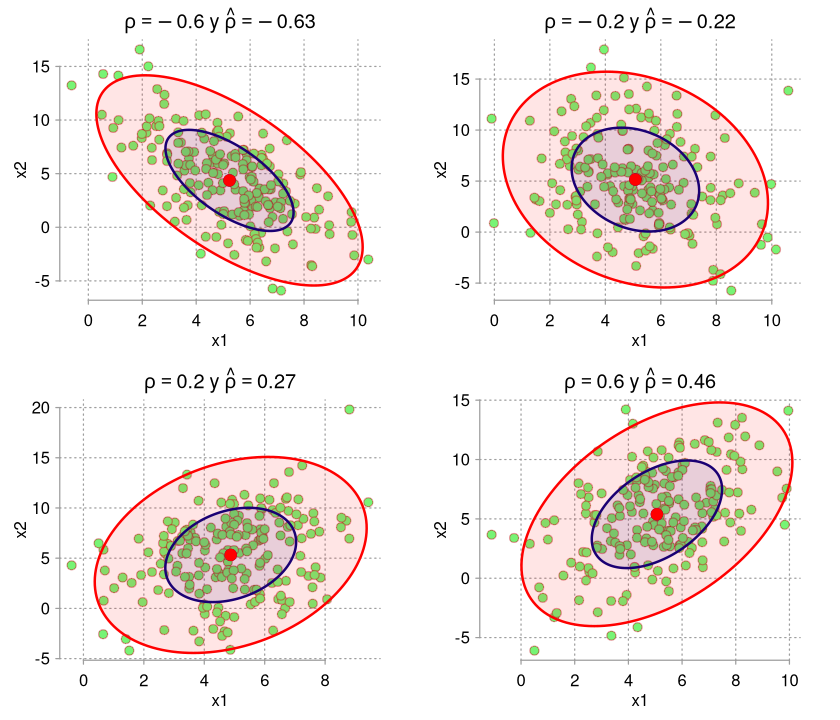

In [50]:
rho_vec <- c(-0.6, -0.2, 0.2, 0.6)
sigma_1 <- 2#
sigma_2 <- 4
sigma_vec <- c(sigma_1, sigma_2)
mu_vec <- c(5, 5)

par(
  mfrow = c(2, 2),
  mgp = c(1.5, 0.5, 0),
  mar = c(3, 3, 2, 2)
)

for (rho in rho_vec) {
  x <- sim_bivariate(rho, sigma_vec, mu_vec, N = 200, seed = 145)
  
  scatter_plot(
    x[, 1], x[, 2],
    xlab = "x1",
    ylab = "x2",
    fill = green_light,
    color = red_light,
    main = parse(text = sprintf("rho == %s~y~hat(rho)==%s", rho, cor(x[, 1], x[, 2]) |> round(2)))
  )

  # plot(
  #   x,
  #   xlab = "x1",
  #   ylab = "x2",
  #   main = parse(text = sprintf("rho == %s~y~hat(rho)==%s", rho, cor(x[,1], x[,2]) |> round(2))
  # )
  # )
  rad <- qchisq(p = c(0.5, .95), df = ncol(x))
  rad <- sqrt(rad)
  plot_ellipse(x, rad, colores = c("navy", "red"))
}


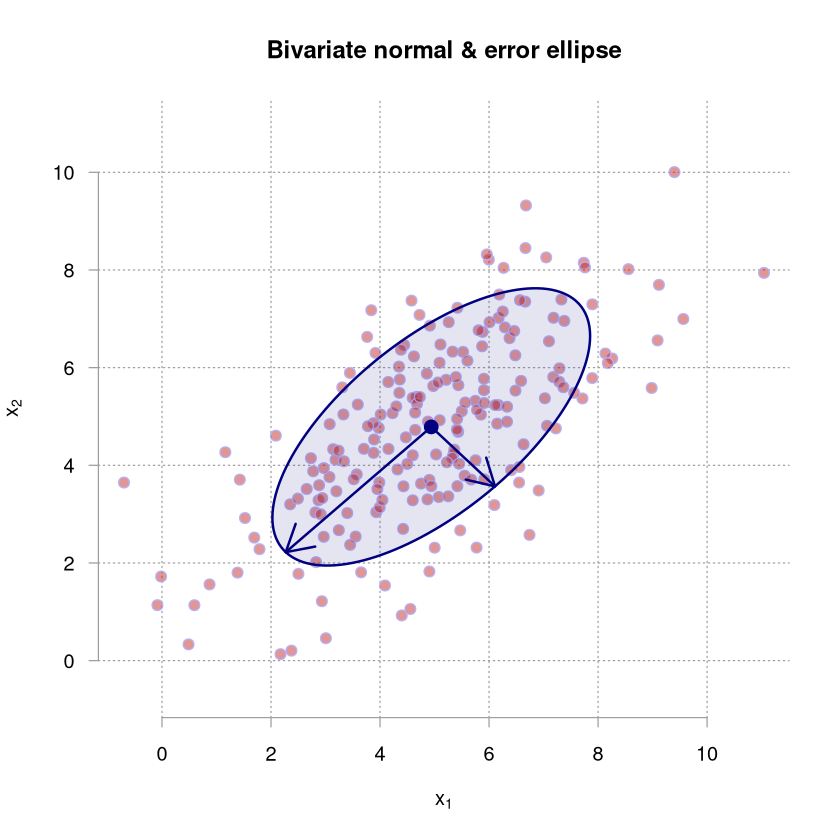

In [51]:
# Ahora veremos cómo se relacionan los eigenvectores y eigenvalores
# con los ejes del elipse
options(repr.plot.width = 7, repr.plot.height = 7)
sigma_1 <- 2
sigma_2 <- 2
mu_vec <- c(5, 5)
x <- sim_bivariate(0.6, c(sigma_1, sigma_2), mu_vec, 200, seed = 123)
scatter_plot(
  x = x[ ,1], y = x[ ,2],
  color = blue_light, fill = red_light,
  xlim = range(x), ylim = range(x),
  main = "Bivariate normal & error ellipse",
  xlab = expression(x[1]), ylab = expression(x[2])
)

rad <- qchisq(p = .95, df = ncol(x))
rad <- sqrt(rad)
# radio a mu + sd, approx 
rad2 <- qchisq(0.6826895, 2) |> sqrt()
plot_ellipse(x, rad2, colores = c('navy', 'red'))
covX <- cov(x)
eigVal <- eigen(covX)$values
eigVec <- eigen(covX)$vectors
# media empírica (vector)
emp_mean <- colMeans(x)
# obtener el eigenvector correspondiente al eigenvalor más largo
max_eigen_val_index <- which.max(eigVal)
max_eigVal <- eigVal[max_eigen_val_index]
max_eigVec <- eigVec[, max_eigen_val_index]
# correspondiente al eigenvalor más corto
min_eigVal <- eigVal[-max_eigen_val_index]
min_eigVec <- eigVec[ ,-max_eigen_val_index]
# dibujar el eje mayor
arrows(
  # x0, y0
  emp_mean[1], emp_mean[2],
  # x1
  emp_mean[1] + sqrt(max_eigVal) * max_eigVec[1] * rad2, 
  # y1
  emp_mean[2] + sqrt(max_eigVal) * max_eigVec[2] * rad2,
  col = 'navy',
  lwd = 2
)
# dibujar el eje menor
arrows(
  emp_mean[1], emp_mean[2],
  emp_mean[1] + sqrt(min_eigVal) * min_eigVec[1] * rad2,
  emp_mean[2] + sqrt(min_eigVal) * min_eigVec[2] * rad2,
  col = "navy",
  lwd = 2
)

Notar que los eigenvectores son ortogonales entre sí (su producto punto es 0, `eigVec[,1] %*% eigVec[,2]`). Luego en el tema de PCA veremos que el eigenvector correspondiente al eigenvalor más largo corresponde al componente principal 1, que es el componente en una matriz en donde existe mayor variación. 

#### Gráficos marginales usando 

Los gráficos de histogramas marginales al gráfico de dispersión pueden aportar información adicional que no es del todo visible con el mero gráfico de dispersión. Por ejemplo, la existencia de outliers, la normalidad de las distribuciones marginales, etc.

1. Opción `{ggplot}` y `{ggExtra}`.
2. Opción `{base}` usando la función `scatter_marginal()` personalizada del script `utilities`.


##### Opción 1

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



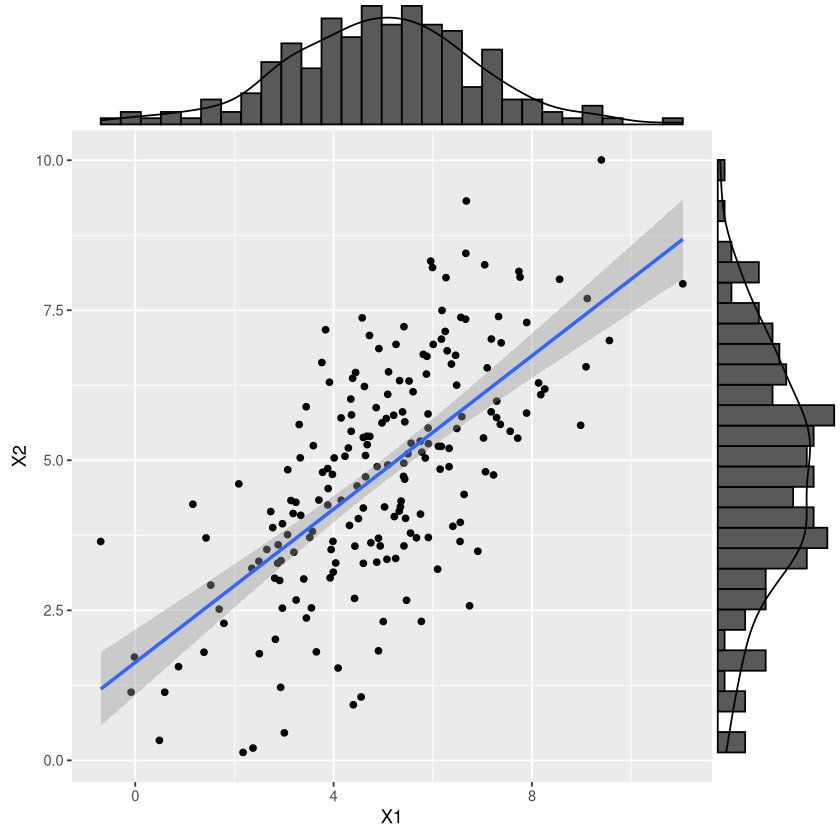

In [52]:
library(tidyverse)
library(ggExtra)

colnames(x) <- c("X1", "X2")

p_scatter <- ggplot(
  x |> as.data.frame(),
  aes(x = X1, y = X2)
) +
  geom_point() +
  geom_smooth(method = "lm")

ggMarginal(p_scatter, type = "densigram")


##### Opción 2

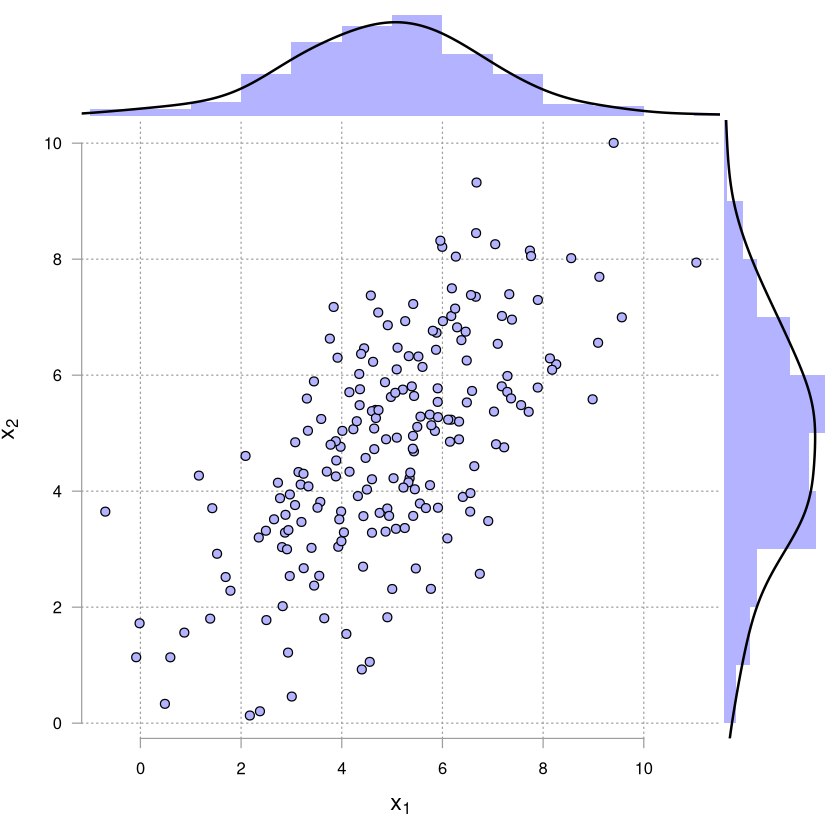

In [53]:
scatter_marginal(
  x = x[, 1], y = x[, 2],
  fill = blue_light, color = 1,
  xlab = expression(x[1]), 
  ylab = expression(x[2]),
  cex.lab = 1.4
)

# TODO:
Detectar outliers